In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv('WeightData.csv')
print(df)


    Weight  Height
0       45     120
1       58     135
2       48     123
3       60     135
4       70     160
5       78     162
6       80     163
7       90     175
8       95     182
9       78     170
10      82     176
11      95     182
12     105     175
13     100     183
14      85     170
15      78     177
16      50     140
17      65     159
18      76     150
19      87     167
20      45     129
21      56     140
22      72     160


Text(0, 0.5, 'Height')

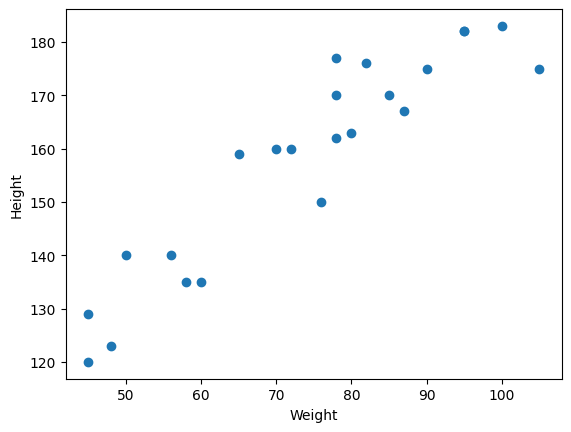

In [30]:
### scatter plot to see relationship
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [31]:
## finding corelation
df.corr()

,Weight,Height
Weight,1.000000,0.929215
Height,0.929215,1.000000


In [32]:
## starting a linear regresssion
# st1 -> divide features into dependent and independent features
X = df[['Weight']] ## independent features should be in the dataframe formate or 2D array
Y = df['Height'] ## dependent feature should be in series or 1D array
Y

0     120
1     135
2     123
3     135
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [33]:
#st2 -> train test split > one for training and other for testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [34]:
X_train.shape

(17, 1)

In [35]:
## st3 -> standardization this only applies on independent feature
from sklearn.preprocessing import StandardScaler


In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [37]:
X_test = scaler.transform(X_test) ## we are only using transform because of data leakage.

In [38]:
## st4 -> apply simple linear regression
from sklearn.linear_model import LinearRegression


In [39]:
regression = LinearRegression(n_jobs=-1)

In [40]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [41]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)


Coefficient or slope: [17.74259867]
Intercept: 155.88235294117646


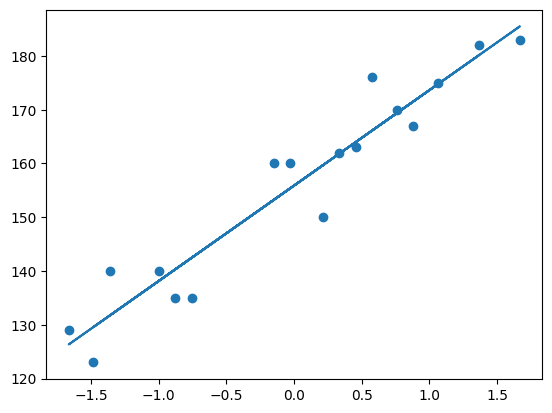

In [43]:
## plot best fit line respect to training data
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train)) #plot line

### Prediction of test_data
predicted height_output = intercept + coef_(Weight)

y_pred_test = 155.47 + 17.29(X_test)

In [45]:
## prediction for test data
y_pred = regression.predict(X_test)

In [46]:
## performance matrices
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse= mean_squared_error(Y_test,y_pred)
mae= mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

119.41157269356218
9.766715768442802
10.927560235183432


### R square
R^2 = 1- SSR/SST

R^2 = coefficient of determination , SSR -> sum of square of residuals , SST -> total sum of squares

In [47]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)
print(score)

0.7255782561782165


## Adjusted R^2

Adj R^2 = 1- [(1-R^2)*(n-1)/(n-k-1)]

n= no of observation 

k = no of predictior valiables

In [48]:
## adjusted R^2

1- (1-score)*(len(Y_test)-1)/(len(Y_test) - X_test.shape[1]-1)

0.6569728202227706

In [52]:
## OLS linear regression
import statsmodels.api as sm

In [53]:
model = sm.OLS(Y_train,X_train).fit()

In [54]:
prediction = model.predict(X_test)
print(prediction)

[  5.94326803   5.94326803 -29.52666137  24.2156559   -8.02973446
  34.96411935]


In [55]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):             -0.049
Method:                 Least Squares   F-statistic:                             0.2070
Date:                Sun, 27 Oct 2024   Prob (F-statistic):                       0.655
Time:                        13:56:03   Log-Likelihood:                         -109.97
No. Observations:                  17   AIC:                                      221.9
Df Residuals:                      16   BIC:                                      222.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\StartingML\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [57]:
## prediction for new data
regression.predict(scaler.transform([[72]]))

c:\StartingML\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.3765429])